In [ ]:
!wget https://www.dropbox.com/s/a7e729pm0kbdmys/pedestrians.avi
!wget https://www.dropbox.com/s/t11jgf4vv61rxg8/secuencia_color.mov

--2021-11-23 13:27:33--  https://www.dropbox.com/s/a7e729pm0kbdmys/pedestrians.avi
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/a7e729pm0kbdmys/pedestrians.avi [following]
--2021-11-23 13:27:33--  https://www.dropbox.com/s/raw/a7e729pm0kbdmys/pedestrians.avi
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc66796caa931ec50c9fdf254d80.dl.dropboxusercontent.com/cd/0/inline/Bagt54BHnXQTN74XHbyWMDzP_RuqNOV2WyB6Rig7SZx2C67eZmzbrcVOcfYYrQizD7XLYVKtHuF2dXQsr35uHG7wstgCLky4vn6BbNmmV-fH6UCIiWaNrQiKAjw6oReKq5xyKrIw4BB35OXOqviEk2tm/file# [following]
--2021-11-23 13:27:34--  https://uc66796caa931ec50c9fdf254d80.dl.dropboxusercontent.com/cd/0/inline/Bagt54BHnXQTN74XHbyWMDzP_RuqNOV2WyB6Rig7SZx2C67eZmzbrcVOcfYYrQizD7XLYVKtHuF2dXQsr

In [ ]:
# define helper function to display videos
import io 
import os

from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=640):
  # show resulting deepsort video
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [ ]:
# fvideo = 'pedestrians.avi'
fvideo = 'secuencia_color.mov'

In [ ]:
show_video(fvideo)

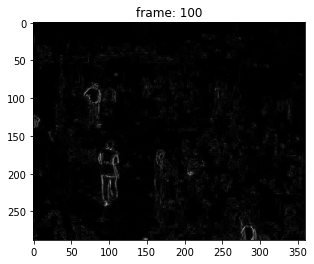

<Figure size 432x288 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


vidcap = cv2.VideoCapture(fvideo)
success, image = vidcap.read()
image = image[:, :, ::-1]
count = 1

B = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Bd = B.astype(float)
Dd = Bd


N = 100

while success and count < N:
    success, image = vidcap.read()
    count += 1
    if success and count <= N:
        clear_output(wait=True)
    image = image[:, :, ::-1]
    F = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    Fd = F.astype(float)
    Dd = np.abs(Bd-Fd)
    Bd = Fd
    plt.figure(1)
    plt.imshow(Dd,cmap='gray')
    plt.title('frame: ' + str(count))
    plt.pause(0.1)
    plt.clf()